In [1]:
data_path = 'C:/PillView/NIH/nd320-c4-wearable-data-project-starter/data'
data_path2 = 'D:/Datasets/competition_data/Training_data'

In [28]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import scipy.io
import scipy as sp
from fastai.vision.all import *
import mpld3
%matplotlib inline

import scipy as sp
from scipy import io, signal

In [3]:
files = get_files(data_path2)
files

(#27) [Path('D:/Datasets/competition_data/Training_data/DATA_01_TYPE01.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_01_TYPE01_BPMtrace.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_02_TYPE02.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_02_TYPE02_BPMtrace.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_03_TYPE02.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_03_TYPE02_BPMtrace.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_04_TYPE02.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_04_TYPE02_BPMtrace.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_05_TYPE02.mat'),Path('D:/Datasets/competition_data/Training_data/DATA_05_TYPE02_BPMtrace.mat')...]

In [4]:
def lf(fl):
    data = sp.io.loadmat(fl)
    #return data.values(), data['sig'].shape, data['sig']
    return data.keys()

In [5]:
lf(files[2])

dict_keys(['__header__', '__version__', '__globals__', 'sig'])

In [6]:
def get_lf(fl, key='sig'):
    data = sp.io.loadmat(fl)[key]
    return data

In [7]:
#have about 5 minutes of data - shape divided by sampling rate which is 125 divide by 60
sh = get_lf(files[2]).shape
sh[-1] / 125 / 60

5.046666666666667

In [8]:
sh = get_lf(files[0], key='sig').shape
shj = np.arange(sh[-1] / 125)

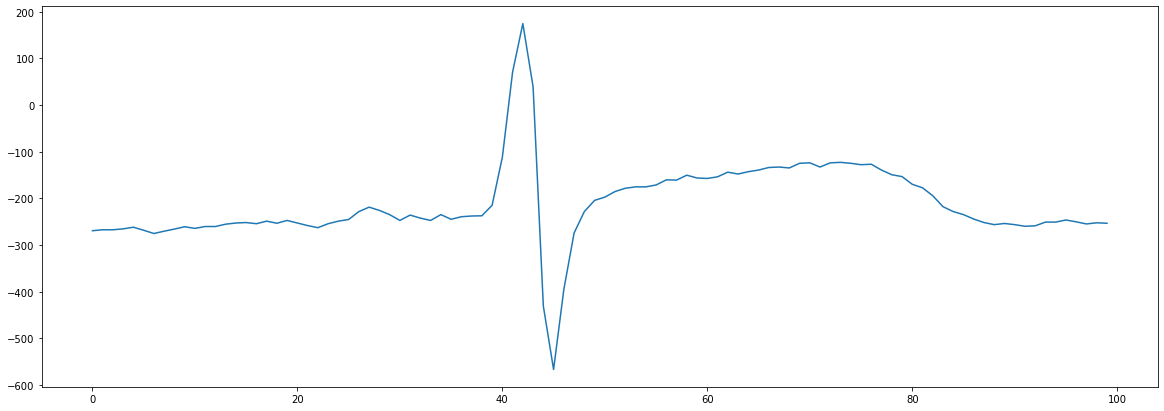

In [15]:
plt.figure(figsize=(20,7))
plt.plot(get_lf(files[0], key='sig')[0][:100])

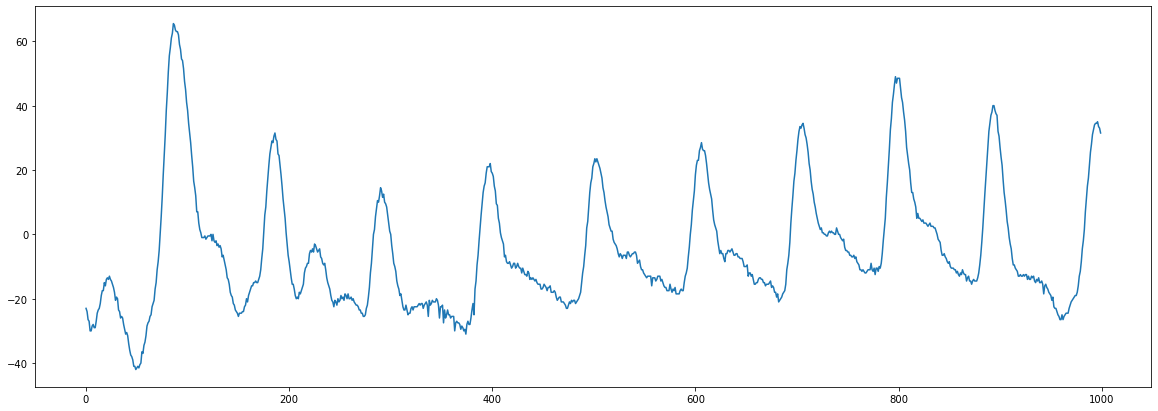

In [13]:
plt.figure(figsize=(20,7))
plt.plot(get_lf(files[0], key='sig')[1][:1000]);

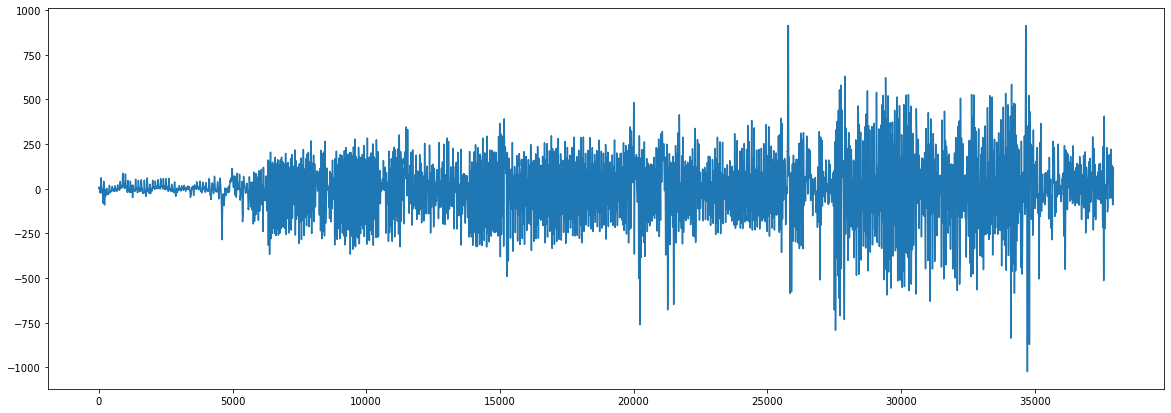

In [11]:
plt.figure(figsize=(20,7))
plt.plot(get_lf(files[0], key='sig')[2])

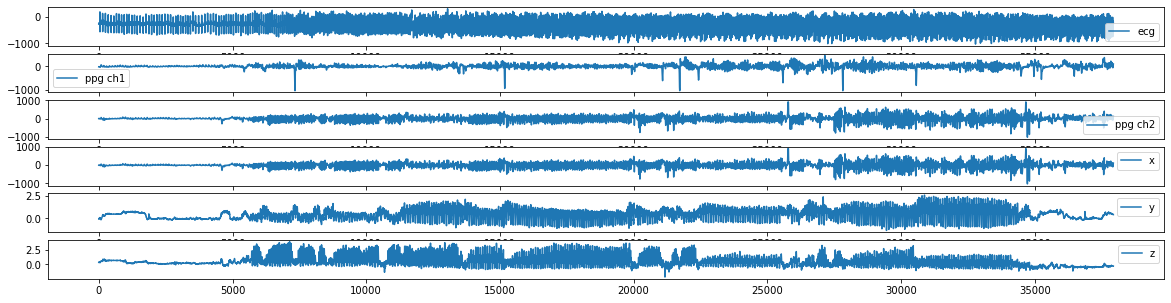

In [21]:
plt.figure(figsize=(20,5))
plt.clf()
plt.subplot(6, 1, 1)
#plt.plot(ts, sig, 'b', label='original')
plt.plot(get_lf(files[0], key='sig')[0], label='ecg')
plt.legend()
plt.subplot(6, 1, 2)
#plt.plot(ts, sig, 'b', label='original')
plt.plot(get_lf(files[0], key='sig')[1], label='ppg ch1')
plt.legend()
plt.subplot(6, 1, 3)
#plt.plot(ts, sig, 'b', label='original')
plt.plot(get_lf(files[0], key='sig')[2], label='ppg ch2')
plt.legend()
plt.subplot(6, 1, 4)
#plt.plot(ts, sig, 'b', label='original')
plt.plot(get_lf(files[0], key='sig')[2], label='x')
plt.legend()
plt.subplot(6, 1, 5)
#plt.plot(ts, sig2, 'orange', label='new')
plt.plot(get_lf(files[0], key='sig')[3], label='y')
plt.legend()
plt.subplot(6, 1, 6)
#plt.plot(ts, sig2, 'orange', label='new')
plt.plot(get_lf(files[0], key='sig')[4], label='z')
plt.legend()

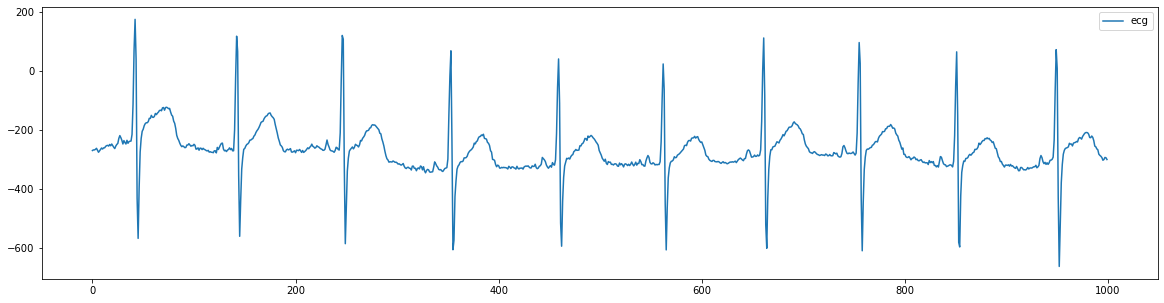

In [25]:
plt.figure(figsize=(20,5))
plt.plot(get_lf(files[0], key='sig')[0][:1000], label='ecg')
plt.legend()

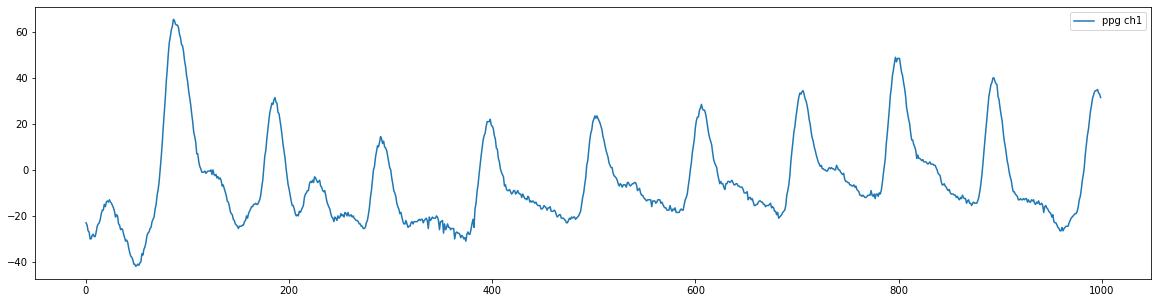

In [26]:
plt.figure(figsize=(20,5))
plt.plot(get_lf(files[0], key='sig')[1][:1000], label='ppg ch1')
plt.legend()

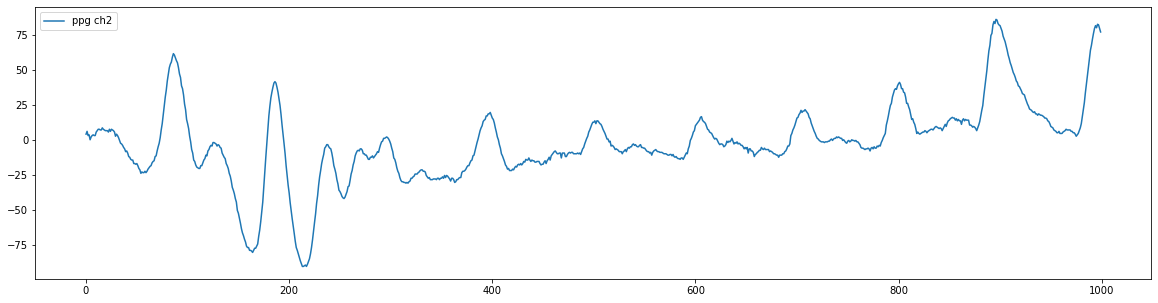

In [27]:
plt.figure(figsize=(20,5))
plt.plot(get_lf(files[0], key='sig')[2][:1000], label='ppg ch2')
plt.legend()

In [30]:
s1 = get_lf(files[0], key='sig')[1]
s2 = get_lf(files[0], key='sig')[2]
s = s1 + s2

In [33]:
freqs = np.fft.rfftfreq(len(s), 1/125)
fft = np.fft.rfft(s)

In [34]:
freqs

array([0.00000000e+00, 3.29493634e-03, 6.58987268e-03, ...,
       6.24917627e+01, 6.24950576e+01, 6.24983525e+01])

In [35]:
fft

array([ 1.39939500e+05+0.00000000e+00j, -1.85939717e+04+7.76922084e+04j,
        3.86419654e+04+9.20000270e+03j, ...,
       -2.06203706e+02+1.69217743e+02j,  3.09708411e+01+3.69811436e+01j,
       -1.50644948e+02-6.45945583e+00j])

In [36]:
len(fft), len(freqs), len(s)

(18969, 18969, 37937)

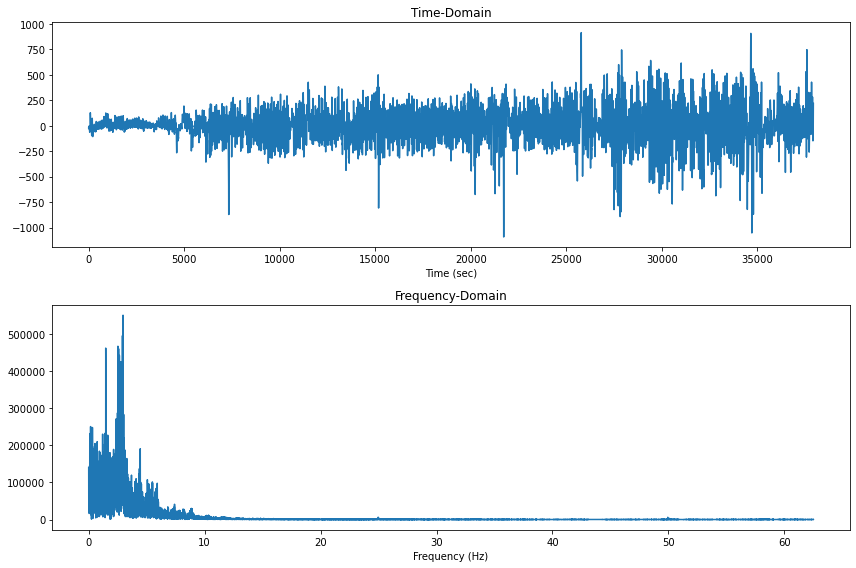

In [38]:
plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(s)
plt.title('Time-Domain')
plt.xlabel('Time (sec)')
plt.subplot(2,1,2)
plt.plot(freqs, np.abs(fft))
plt.title('Frequency-Domain')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()

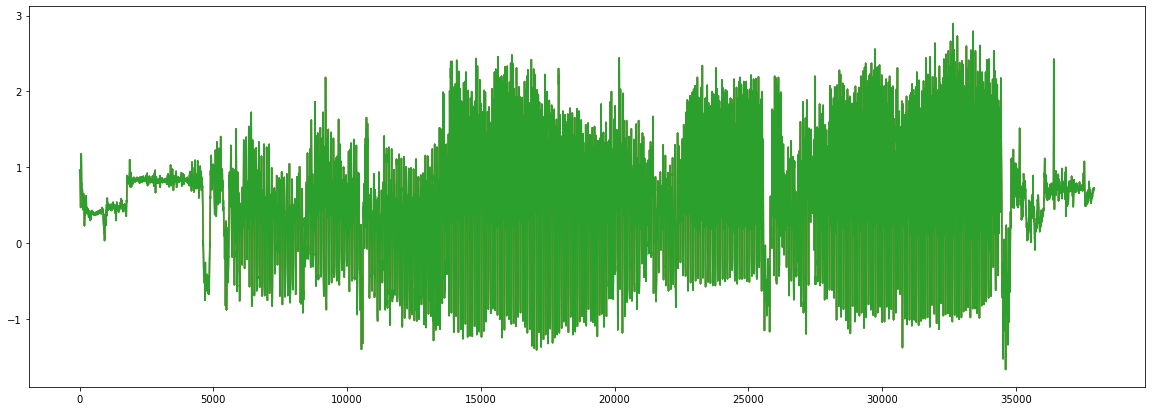

In [20]:
plt.figure(figsize=(20,7))
sh = get_lf(files[0], key='sig').shape
for i in range (0,int(sh[0])):
    plt.clf()
    plt.plot(get_lf(files[0], key='sig')[i])
    plt.plot(get_lf(files[0], key='sig')[i])
    plt.plot(get_lf(files[0], key='sig')[i])
    plt.draw()

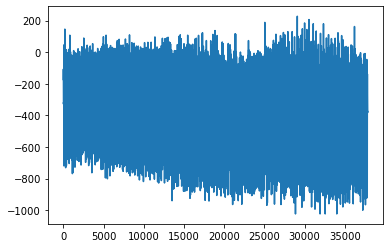

In [8]:
plt.plot(get_lf(files[2], key='sig')[0])

In [10]:
lf(files[1])

KeyError: 'sig'

In [9]:
_,_,sig = lf(files[0])
sig

array([[-2.695e+02, -2.675e+02, -2.675e+02, ..., -1.885e+02, -2.090e+02,
        -2.320e+02],
       [-2.300e+01, -2.400e+01, -2.650e+01, ...,  6.700e+01,  8.450e+01,
         1.000e+02],
       [ 4.000e+00,  6.000e+00,  3.000e+00, ...,  8.600e+01,  1.040e+02,
         1.185e+02],
       [-7.020e-02, -7.020e-02, -5.460e-02, ...,  4.134e-01,  4.134e-01,
         4.134e-01],
       [ 3.432e-01,  3.588e-01,  3.666e-01, ..., -2.808e-01, -2.730e-01,
        -2.730e-01],
       [ 9.594e-01,  9.438e-01,  9.360e-01, ...,  7.254e-01,  7.176e-01,
         7.254e-01]])

In [78]:
r = sig[3] / 60

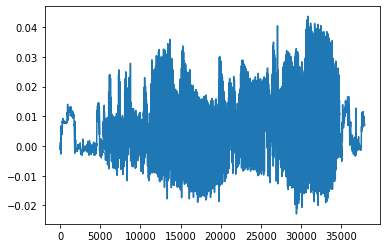

In [79]:
plt.clf()
plt.plot(r)

In [45]:
mpld3.enable_notebook()

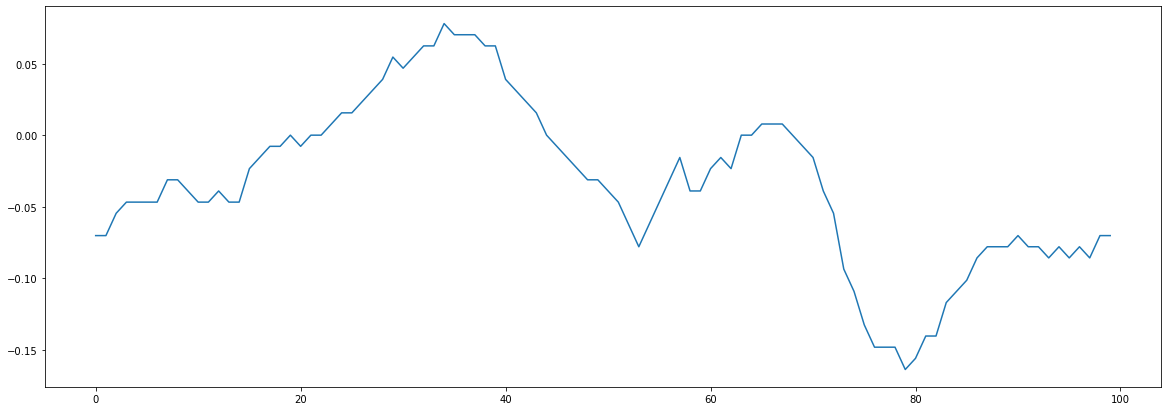

In [10]:
plt.figure(figsize=(20,7))
plt.plot(sig[3][:100])

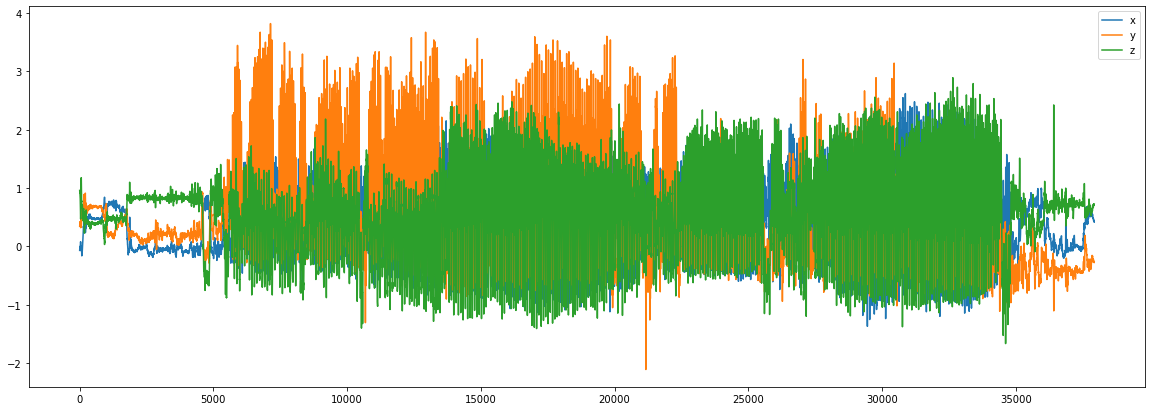

In [7]:
plt.figure(figsize=(20,7))
plt.plot(sig[3], label='x')
plt.plot(sig[4], label='y')
plt.plot(sig[5], label='z')
plt.legend();

In [3]:
filenames = [os.path.splitext(f)[0] for f in sorted(os.listdir(f'{data_path}/mat'))]
filenames

['DATA_01_TYPE01', 'DATA_02_TYPE02', 'REF_01_TYPE01', 'REF_02_TYPE02']

In [5]:
filenames2 = [os.path.splitext(f)[0] for f in sorted(os.listdir(f'{data_path2}'))]
print(filenames2)

['DATA_01_TYPE01', 'DATA_01_TYPE01_BPMtrace', 'DATA_02_TYPE02', 'DATA_02_TYPE02_BPMtrace', 'DATA_03_TYPE02', 'DATA_03_TYPE02_BPMtrace', 'DATA_04_TYPE02', 'DATA_04_TYPE02_BPMtrace', 'DATA_05_TYPE02', 'DATA_05_TYPE02_BPMtrace', 'DATA_06_TYPE02', 'DATA_06_TYPE02_BPMtrace', 'DATA_07_TYPE02', 'DATA_07_TYPE02_BPMtrace', 'DATA_08_TYPE02', 'DATA_08_TYPE02_BPMtrace', 'DATA_09_TYPE02', 'DATA_09_TYPE02_BPMtrace', 'DATA_10_TYPE02', 'DATA_10_TYPE02_BPMtrace', 'DATA_11_TYPE02', 'DATA_11_TYPE02_BPMtrace', 'DATA_12_TYPE02', 'DATA_12_TYPE02_BPMtrace', 'Readme', 'Readme']


In [7]:
def LoadTroikaDataset(data_dir):
    """
    Retrieve the .mat filenames for the troika dataset.

    Review the README in ./datasets/troika/ to understand the organization of the .mat files.

    Returns:
        data_fls: Names of the .mat files that contain signal data
        ref_fls: Names of the .mat files that contain reference data
        <data_fls> and <ref_fls> are ordered correspondingly, so that ref_fls[5] is the 
            reference data for data_fls[5], etc...
    """
    data_fls = sorted(glob.glob(data_dir + "/DATA_*.mat"))
    ref_fls = sorted(glob.glob(data_dir + "/REF_*.mat"))
    return data_fls, ref_fls

In [8]:
data_dir = f'{data_path}/mat'

In [9]:
d, t = LoadTroikaDataset(data_dir)
d, t

(['C:/PillView/NIH/nd320-c4-wearable-data-project-starter/data/mat\\DATA_01_TYPE01.mat',
  'C:/PillView/NIH/nd320-c4-wearable-data-project-starter/data/mat\\DATA_02_TYPE02.mat'],
 ['C:/PillView/NIH/nd320-c4-wearable-data-project-starter/data/mat\\REF_01_TYPE01.mat',
  'C:/PillView/NIH/nd320-c4-wearable-data-project-starter/data/mat\\REF_02_TYPE02.mat'])

In [12]:
data_dir2 = f'{data_path2}'

In [14]:
d1, t1 = LoadTroikaDataset(data_dir2)
t1

[]

In [10]:
def LoadTroikaDataFile(data_fl):
    """
    Loads and extracts signals from a troika data file.

    Usage:
        data_fls, ref_fls = LoadTroikaDataset()
        ppg, accx, accy, accz = LoadTroikaDataFile(data_fls[0])

    Args:
        data_fl: (str) filepath to a troika .mat file.

    Returns:
        numpy arrays for ppg, accx, accy, accz signals.
    """
    data = sp.io.loadmat(data_fl)['sig']
    return data[2:]

In [11]:
test = LoadTroikaDataFile(d[0])
test.shape

(4, 37937)

In [ ]:
test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1023.5 ,  -829.75,  -636.  ,  -442.25,  -248.5 ,   -54.75,
          139.  ,   332.75,   526.5 ,   720.25,   914.  ]),
 <a list of 37937 BarContainer objects>)

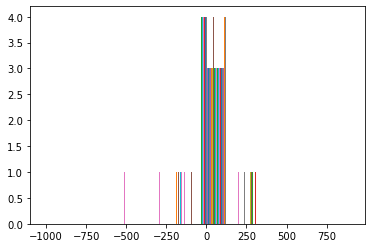

In [9]:
plt.hist(test[:100])